# Machine Learning Data

---

Now, we are going to apply some ML algorithms on lightcurves contained: 

- 0: Confirmed Exoplanets
- 1: Eclipsing Binaries
- 2: Non Eclipsed

With that in mind, the data from (1) and (2) will be downloaded from the [CoRoT Public Archive](http://idoc-corot.ias.u-psud.fr/sitools/client-user/COROT_N2_PUBLIC_DATA/project-index.html) and transformed into CSV files, just like we did for (0): Confirmed Exoplanets on `01 - Manipulating fits files`

# Tests

In [ ]:
import pandas as pd
import numpy as np
import os

!pip install control
from tools import *

In [ ]:
# FILE_PATH = r'C:\Users\guisa\Google Drive\01 - Iniciação Científica\02 - Datasets\csv_files\EN2_STAR_CHR_0101086161_20070516T060226_20071005T074409.csv'
FILE_PATH = '/content/drive/MyDrive/01 - Iniciação Científica/02 - Datasets/csv_files/EN2_STAR_CHR_0101086161_20070516T060226_20071005T074409.csv'

Reading one time series

In [ ]:
data = pd.read_csv(FILE_PATH)

data.head()

,DATE,WHITEFLUX
0,2007-05-16 18:10:55.071642,112626.77
1,2007-05-16 18:19:27.113766,112605.61
2,2007-05-16 18:27:59.155929,112771.50
3,2007-05-16 18:36:31.198092,113113.60
4,2007-05-16 18:45:03.240256,112621.79


Taking only the flux and "saving" it as `pd.Series`

In [ ]:
flux = data.WHITEFLUX
flux

0        32847.277
1        32849.570
2        32850.133
3        32881.668
4        32897.824
           ...    
24451    33611.984
24452    33498.582
24453    33537.754
24454    33552.040
24455    33650.860
Name: WHITEFLUX, Length: 24456, dtype: float64

Creating a `pd.DataFrame` and appending the data from `flux` to the first column and the first row.

Later, we are going to do the same for lightcurves

In [ ]:
# to SkTime
DF = pd.DataFrame()

DF = DF.append([[flux]], ignore_index=True)
DF.columns = ['time_series']

DF.head()

###############################################################################

# to SKLEARN
# DF = pd.DataFrame()

# DF = DF.append(flux, ignore_index=True)

# DF.head()

,time_series
0,0 32847.277 1 32849.570 2 ...


In [ ]:
DF.iloc[0][0]

0        32847.277
1        32849.570
2        32850.133
3        32881.668
4        32897.824
           ...    
24451    33611.984
24452    33498.582
24453    33537.754
24454    33552.040
24455    33650.860
Name: WHITEFLUX, Length: 24456, dtype: float64

# SkTime

In [ ]:
import pandas as pd
import numpy as np
import os

!pip install control
from tools import *

## Preprocessing data 

###  Creating matrix of features (CoRoT targets with confirmed exoplanets)


In [ ]:
# DATA_DIR = 'C:/Users/guisa/Google Drive/01 - Iniciação Científica/02 - Datasets/csv_files'
# DATA_DIR = '/content/drive/MyDrive/01 - Iniciação Científica/02 - Datasets/csv_files'
DATA_DIR = '/content/drive/MyDrive/01 - Iniciação Científica/02 - Datasets/resampled_files'

In [ ]:
X = pd.DataFrame()

for root_dir_path, sub_dirs, files in os.walk(DATA_DIR):
    for j in range(0, len(files)):
        if files[j] != ('desktop.ini' and 'csv_files.rar'):
            # File path
            path = root_dir_path + "/" + files[j] 
            
            # Reading data
            # print(path)
            data = pd.read_csv(path)
            flux = data.WHITEFLUX
            
            # Add timeseries to pd.DataFrame
            X = X.append([[flux]], ignore_index=True)

In [ ]:
X.columns = ['time_series']
X.head()

,time_series
0,0 141157.216020 1 141242.434636 ...
1,0 26051.806326 1 26113.304520 2 ...
2,0 1.298393e+06 1 1.299550e+06 2 ...
3,0 112521.329834 1 112758.045853 ...
4,0 40643.684746 1 40245.967717 2 ...


In [ ]:
X.iloc[0][0]

0        141157.216020
1        141242.434636
2        141132.564812
3        141373.143346
4        141213.262888
             ...      
15045    141147.423729
15046    141100.943892
15047    141378.202818
15048    141228.656766
15049    141309.960163
Name: WHITEFLUX, Length: 15050, dtype: float64

In [ ]:
X.shape

(33, 1)

### Labeling matrix of features

- 0: confirmed_exoplanets
- 1: eclipsing_binaries
- 2: none

In [ ]:
labels = np.zeros(X.size, dtype='int')
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
y = pd.Series(labels)
y.head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [ ]:
y.shape

(33,)

### Creating dataset, X and y

In [ ]:
# Creating pd.DataFrame with X data, and setted columns
df = pd.DataFrame(X, columns=['time_series', 'label'])

# Adding labels
df.label = y

df.head()

,time_series,label
0,0 141157.216020 1 141242.434636 ...,0
1,0 26051.806326 1 26113.304520 2 ...,0
2,0 1.298393e+06 1 1.299550e+06 2 ...,0
3,0 112521.329834 1 112758.045853 ...,0
4,0 40643.684746 1 40245.967717 2 ...,0


How many Labels we got ?

In [ ]:
labels, counts = np.unique(y, return_counts=True)
print('Labels =', labels, '\nCounts =', counts)

Labels = [0] 
Counts = [33]


## Machine Learning - SkTime

https://github.com/alan-turing-institute/sktime/tree/v0.4.3

https://github.com/alan-turing-institute/sktime/blob/main/sktime/classification/compose/__init__.py

### **Preliminaries**

In [ ]:
# !pip install sktime[all_extras]

### **Splitting the dataset into the Training set and Test set**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(24, 1) (24,) (9, 1) (9,)


### **Time Series Classification**


https://towardsdatascience.com/sktime-a-unified-python-library-for-time-series-machine-learning-3c103c139a55

In [ ]:
from sktime.classification.all import TimeSeriesForestClassifier

classifier = TimeSeriesForestClassifier()
classifier.fit(X_train, y_train)

TimeSeriesForestClassifier()

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

### **Feature extraction**

In [ ]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

In [ ]:
from sktime.transformations.panel.tsfresh import TSFreshFeatureExtractor

transformer = TSFreshFeatureExtractor(default_fc_parameters="minimal")

extracted_features = transformer.fit_transform(X_train)
extracted_features.head()


Feature Extraction: 100%|██████████| 5/5 [00:00<00:00, 18.29it/s]


,time_series__sum_values,time_series__median,time_series__mean,time_series__length,time_series__standard_deviation,time_series__variance,time_series__root_mean_square,time_series__maximum,time_series__minimum
0,2.124862e+09,141218.330072,141186.836848,15050.0,282.683706,79910.077814,141187.119841,142021.360654,138999.945791
4,6.136100e+08,40704.273331,40771.427763,15050.0,560.265206,313897.101078,40775.277055,44921.695568,39239.685767
16,6.258849e+08,41653.547836,41587.034197,15050.0,364.389989,132780.064141,41588.630578,42472.076073,40477.653465
5,4.512183e+09,299686.539820,299812.826420,15050.0,613.298072,376134.525086,299813.453701,302311.608084,297465.565232
13,5.857504e+08,38822.561668,38920.292034,15050.0,553.820584,306717.239608,38924.232160,40531.501716,37855.665849


In [ ]:
# If the result is 1, it means that the entire dataset has de same lenght

extracted_features.time_series__length.nunique()

1

### **Time Series Classification with Feature Extraction**

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

classifier = make_pipeline(
    TSFreshFeatureExtractor(show_warnings=False), RandomForestClassifier()
)
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)


Feature Extraction: 100%|██████████| 5/5 [07:48<00:00, 93.60s/it]

Feature Extraction: 100%|██████████| 5/5 [02:50<00:00, 34.17s/it]


1.0

# SkLearn

In [ ]:
import pandas as pd
import numpy as np
import os

!pip install control
from tools import *

## Preprocessing data

###  Creating matrix of features (CoRoT targets with confirmed exoplanets)


In [ ]:
# DATA_DIR = 'C:/Users/guisa/Google Drive/01 - Iniciação Científica/02 - Datasets/csv_files'
# DATA_DIR = '/content/drive/MyDrive/01 - Iniciação Científica/02 - Datasets/csv_files'
DATA_DIR = '/content/drive/MyDrive/01 - Iniciação Científica/02 - Datasets/resampled_files'

In [ ]:
X = pd.DataFrame()

for root_dir_path, sub_dirs, files in os.walk(DATA_DIR):
    for j in range(0, len(files)):
        if files[j] != ('desktop.ini' and 'csv_files.rar'):
            # File path
            path = root_dir_path + "/" + files[j] 
            
            # Reading data
            # print(path)
            data = pd.read_csv(path)
            flux = data.WHITEFLUX
            
            # Add timeseries to pd.DataFrame
            X = X.append(flux, ignore_index=True)

In [ ]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,15010,15011,15012,15013,15014,15015,15016,15017,15018,15019,15020,15021,15022,15023,15024,15025,15026,15027,15028,15029,15030,15031,15032,15033,15034,15035,15036,15037,15038,15039,15040,15041,15042,15043,15044,15045,15046,15047,15048,15049
0,1.411572e+05,1.412424e+05,1.411326e+05,1.413731e+05,1.412133e+05,1.413579e+05,1.411959e+05,1.412497e+05,1.413829e+05,1.414096e+05,1.412703e+05,1.412327e+05,1.411492e+05,1.412873e+05,1.412144e+05,1.411442e+05,1.412001e+05,1.412225e+05,1.413235e+05,1.412076e+05,1.411856e+05,1.411647e+05,1.412128e+05,1.413366e+05,1.412635e+05,1.413088e+05,1.413307e+05,1.411438e+05,1.412988e+05,1.411502e+05,1.411364e+05,1.414083e+05,1.410876e+05,1.411729e+05,1.412924e+05,1.413673e+05,1.412330e+05,1.411206e+05,1.413310e+05,1.411721e+05,...,1.411859e+05,1.411025e+05,1.410474e+05,1.411354e+05,1.411319e+05,1.412317e+05,1.411159e+05,1.412205e+05,1.411621e+05,1.411025e+05,1.412063e+05,1.411235e+05,1.411927e+05,1.412480e+05,1.412074e+05,1.411396e+05,1.411576e+05,1.410457e+05,1.411399e+05,1.408885e+05,1.409958e+05,1.411260e+05,1.411951e+05,1.411575e+05,1.411057e+05,1.411124e+05,1.412933e+05,1.411076e+05,1.410541e+05,1.411741e+05,1.409121e+05,1.409989e+05,1.412270e+05,1.411838e+05,1.413012e+05,1.411474e+05,1.411009e+05,1.413782e+05,1.412287e+05,1.413100e+05
1,2.605181e+04,2.611330e+04,2.601663e+04,2.614152e+04,2.587125e+04,2.587146e+04,2.602901e+04,2.604010e+04,2.611140e+04,2.607349e+04,2.612061e+04,2.601961e+04,2.608381e+04,2.615512e+04,2.605209e+04,2.615393e+04,2.595893e+04,2.613356e+04,2.608572e+04,2.604287e+04,2.609076e+04,2.603981e+04,2.604673e+04,2.605018e+04,2.605711e+04,2.603637e+04,2.602297e+04,2.610288e+04,2.599291e+04,2.599706e+04,2.596696e+04,2.610334e+04,2.616852e+04,2.615221e+04,2.600709e+04,2.604340e+04,2.602915e+04,2.623798e+04,2.596439e+04,2.610146e+04,...,2.621469e+04,2.632878e+04,2.624308e+04,2.622704e+04,2.618278e+04,2.624397e+04,2.632099e+04,2.627644e+04,2.625360e+04,2.632872e+04,2.625611e+04,2.633979e+04,2.629440e+04,2.627620e+04,2.635345e+04,2.628232e+04,2.634446e+04,2.636739e+04,2.625771e+04,2.648313e+04,2.638753e+04,2.626968e+04,2.623826e+04,2.630487e+04,2.624348e+04,2.638560e+04,2.620561e+04,2.630678e+04,2.627786e+04,2.616603e+04,2.631367e+04,2.620188e+04,2.618542e+04,2.624512e+04,2.625785e+04,2.642315e+04,2.621238e+04,2.636027e+04,2.629231e+04,2.618336e+04
2,1.298393e+06,1.299550e+06,1.299725e+06,1.299612e+06,1.299747e+06,1.299215e+06,1.299576e+06,1.299769e+06,1.299262e+06,1.299409e+06,1.299280e+06,1.299889e+06,1.299150e+06,1.299826e+06,1.298902e+06,1.299552e+06,1.299346e+06,1.298708e+06,1.299628e+06,1.299107e+06,1.299239e+06,1.299363e+06,1.299605e+06,1.299160e+06,1.299955e+06,1.299210e+06,1.299477e+06,1.299130e+06,1.299318e+06,1.298997e+06,1.299127e+06,1.299335e+06,1.299339e+06,1.299389e+06,1.299585e+06,1.299507e+06,1.298837e+06,1.299754e+06,1.298997e+06,1.300436e+06,...,1.295584e+06,1.296259e+06,1.295880e+06,1.296397e+06,1.295613e+06,1.295237e+06,1.295789e+06,1.295417e+06,1.295453e+06,1.295508e+06,1.295937e+06,1.294957e+06,1.295125e+06,1.294599e+06,1.294709e+06,1.295073e+06,1.295429e+06,1.295154e+06,1.295264e+06,1.295769e+06,1.295695e+06,1.295337e+06,1.295557e+06,1.295314e+06,1.295710e+06,1.295153e+06,1.295031e+06,1.295029e+06,1.295460e+06,1.295186e+06,1.294849e+06,1.295283e+06,1.294897e+06,1.294750e+06,1.294881e+06,1.294939e+06,1.295167e+06,1.295158e+06,1.295069e+06,1.294454e+06
3,1.125213e+05,1.127580e+05,1.129430e+05,1.125623e+05,1.127893e+05,1.125752e+05,1.127852e+05,1.126351e+05,1.126462e+05,1.126747e+05,1.128206e+05,1.126230e+05,1.127497e+05,1.127325e+05,1.127567e+05,1.127885e+05,1.126766e+05,1.127609e+05,1.125398e+05,1.127966e+05,1.126471e+05,1.126480e+05,1.128501e+05,1.128040e+05,1.127078e+05,1.128669e+05,1.126771e+05,1.127147e+05,1.127916e+05,1.126816e+05,1.127761e+05,1.126781e+05,1.127678e+05,1.127868e+05,1.125911e+05,1.127481e+05,1.127409e+05,1.126717e+05,1.126739e+0

In [ ]:
X.shape

(33, 15050)

### Labeling matrix of features

- 0: confirmed_exoplanets
- 1: eclipsing_binaries
- 2: none

In [ ]:
labels = np.zeros(X.size, dtype='int')
labels

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y = pd.Series(labels)
y.head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [ ]:
y.shape

(496650,)

### Creating dataset, X and y

In [ ]:
# Creating pd.DataFrame with X data, and setted columns
df = pd.DataFrame(X)

# Adding labels
df['label'] = y

df.sample(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,15011,15012,15013,15014,15015,15016,15017,15018,15019,15020,15021,15022,15023,15024,15025,15026,15027,15028,15029,15030,15031,15032,15033,15034,15035,15036,15037,15038,15039,15040,15041,15042,15043,15044,15045,15046,15047,15048,15049,label
7,30819.826000,30766.330239,30751.556425,30749.078411,30735.472031,30705.364719,30673.455704,30662.058557,30682.811774,30726.006400,30766.044428,30779.528462,30762.480430,30733.670298,30721.967523,30747.701120,30810.995926,30892.582773,30963.134137,30994.637790,30971.285524,30899.489245,30812.158646,30757.956592,30773.076489,30850.996851,30937.516699,30965.531315,30909.779524,30815.873666,30770.754493,30830.580119,30965.570660,31074.862790,31066.062397,30933.718685,30766.639144,30675.022829,30700.963010,30791.397016,...,31257.034885,31264.336563,31300.065245,31342.684879,31375.525377,31386.046775,31362.258516,31301.359103,31225.968013,31185.069625,31225.200043,31348.360808,31494.844160,31574.995403,31532.203536,31387.986425,31230.251847,31151.297131,31183.599756,31282.844881,31368.501950,31386.865644,31347.153080,31306.651124,31321.815477,31405.234907,31518.720306,31602.739344,31617.101315,31564.063024,31481.233700,31413.127641,31382.205800,31377.323280,31364.368751,31310.075393,31203.441067,31062.404104,30923.186993,0
0,141157.216020,141242.434636,141132.564812,141373.143346,141213.262888,141357.927056,141195.854576,141249.723060,141382.882136,141409.646127,141270.347310,141232.742194,141149.203020,141287.347367,141214.443625,141144.196655,141200.096238,141222.533249,141323.471805,141207.648435,141185.552578,141164.668742,141212.764561,141336.627107,141263.521595,141308.810296,141330.700205,141143.809870,141298.757841,141150.205593,141136.397407,141408.260213,141087.606264,141172.925450,141292.442324,141367.329433,141232.994283,141120.579153,141330.990802,141172.077723,...,141102.476944,141047.400969,141135.385006,141131.922378,141231.656466,141115.855797,141220.542768,141162.097924,141102.469348,141206.299004,141123.514021,141192.723871,141248.047431,141207.440681,141139.602971,141157.554097,141045.650680,141139.907409,140888.479585,140995.832130,141126.000693,141195.104186,141157.523028,141105.662748,141112.441533,141293.285098,141107.636577,141054.134890,141174.120525,140912.054405,140998.875288,141227.024526,141183.770462,141301.178908,141147.423729,141100.943892,141378.202818,141228.656766,141309.960163,0
28,62789.448650,63084.529078,62888.248116,62879.160690,62902.299203,62856.785176,62838.438216,62890.327459,62978.468824,62915.586396,63030.280126,62972.033937,63002.387872,62917.744686,62882.950698,62963.445695,63047.080991,62936.457158,62918.843671,62903.944131,62860.251827,62981.319394,62955.393306,62950.430855,62790.031253,62864.886726,62973.441523,62832.014189,62840.955762,62894.206974,62961.589149,63016.263609,62849.370593,62860.779191,62823.774972,62836.445243,62939.162851,63026.291359,63070.556424,62920.886694,...,62681.452641,62818.463320,62658.489891,62751.509989,62673.658088,62645.568598,62681.461059,62508.688815,62410.438476,62357.747106,62424.788206,62287.583036,62463.003606,62461.858904,62661.955794,62695.748268,62763.846757,62617.561068,62713.372410,62667.105538,62616.660149,62616.715432,62717.656437,62704.556538,62715.951555,62749.903309,62744.565477,62690.301100,62640.328884,62562.900647,62681.503019,62595.074849,62785.115156,62726.137782,62662.004908,62639.195962,62595.452252,62665.525918,62690.144817,0
16,41432.330660,41693.673194,41615.060995,41733.206360,41407.073111,41575.178851,41481.167264,41461.696150,41574.132506,41545.980086,41589.135266,41631.806337,41678.861443,41666.674866,41573.258211,41595.650027,41704.488771,41548.087189,41514.108672,41592.132381,41587.728893,41642.447618,41577.163200,41561.930921,41516.422593,41608.456849,41626.788574,41504.738696,41597.093006,41628.753414,41551.683274,41666.509823,41582.059959,41581.388399,41583.151091,41

How many Labels we got ?

In [ ]:
labels, counts = np.unique(y, return_counts=True)
print('Labels =', labels, '\nCounts =', counts)

Labels = [0] 
Counts = [496650]


## Machine Learning

### **Preliminaries**

### **Splitting the dataset into the Training set and Test set**

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(24, 15050) (24,) (9, 15050) (9,)


### **Time Series Classification**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

# from sklearn import svm
# classifier = svm.SVC()

classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[9]]


1.0

# ML Classifier - Periodograms

---



In [11]:
import pandas as pd

FEATURES_DIR = '/content/drive/MyDrive/01 - Iniciação Científica/02 - Datasets/features'
PERIODOGRAMS_DIR = FEATURES_DIR + '/feature_periodograms.csv'

data = pd.read_csv(PERIODOGRAMS_DIR)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,7486,7487,7488,7489,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499,7500,7501,7502,7503,7504,7505,7506,7507,7508,7509,7510,7511,7512,7513,7514,7515,7516,7517,7518,7519,7520,7521,7522,7523,7524,7525
0,3.698734e-21,2.187372e+10,4.653541e+09,2.977435e+10,5.847694e+09,1.299638e+10,9.043435e+09,1.605398e+09,4.163878e+08,6.495074e+08,8.126626e+09,9.406637e+09,2.139047e+09,7.464040e+08,8.710111e+08,3.066070e+08,1.722429e+09,1.694147e+09,9.865663e+08,8.465616e+08,1.380645e+09,3.179946e+07,1.181358e+09,7.756270e+08,1.003634e+08,6.288176e+08,3.771828e+08,8.828726e+08,1.492417e+09,1.647794e+08,1.810905e+09,1.071801e+10,1.822772e+10,8.686493e+08,1.672761e+09,4.151073e+08,1.422037e+08,3.095936e+08,4.878045e+07,3.732714e+08,...,5.859518e+06,1.802153e+07,6.298346e+06,4.934046e+06,3.243160e+07,4.082484e+06,1.900234e+07,1.505044e+07,8.717856e+06,1.667094e+07,2.006054e+07,1.210509e+06,1.945082e+07,7.096113e+06,2.315154e+07,4.012920e+07,1.055361e+06,4.469378e+06,3.237999e+05,4.170387e+06,1.672472e+07,3.123520e+07,1.453152e+06,3.700304e+07,1.612176e+06,1.006348e+07,2.784085e+06,1.442023e+06,1.009989e+07,5.640032e+06,3.093162e+06,6.324198e+07,5.984340e+06,5.636384e+07,6.359579e+06,2.165289e+07,3.362567e+07,1.639384e+06,7.700957e+07,4.122675e+05
1,3.999557e-18,5.784624e+13,5.242573e+12,1.114427e+12,8.653755e+12,3.495333e+13,6.333985e+13,1.223317e+13,7.133227e+11,3.332728e+12,6.307572e+12,1.189972e+13,1.339273e+13,4.585274e+12,2.595879e+12,1.647835e+11,1.322158e+12,3.092180e+12,1.231179e+11,8.636186e+10,3.534272e+10,1.728992e+11,1.773730e+10,1.762227e+11,3.180256e+10,1.703417e+11,2.373593e+10,5.385853e+10,2.690612e+10,7.111801e+10,8.931761e+10,1.096729e+11,3.603436e+10,2.655039e+08,3.324433e+10,1.137900e+11,5.872237e+10,3.719629e+10,4.964274e+10,3.085536e+10,...,1.209086e+09,1.702009e+09,3.732716e+08,3.764944e+07,6.530433e+08,3.449799e+08,2.953255e+06,5.937585e+08,8.981582e+07,3.058008e+08,1.005418e+08,3.397017e+08,3.034542e+08,1.506536e+08,2.785713e+08,6.444151e+08,2.399501e+08,9.712044e+08,3.309554e+08,5.073232e+08,1.480754e+09,4.535894e+08,9.340738e+06,2.035568e+08,7.644298e+08,2.158474e+08,8.841379e+08,2.560128e+08,1.858450e+08,1.644058e+08,7.884955e+08,8.525404e+07,5.671301e+08,6.771197e+08,8.770928e+07,7.573039e+06,2.590354e+08,3.938666e+07,2.073784e+08,3.598600e+08
2,3.301438e-21,1.656106e+11,4.241954e+10,1.295592e+10,1.441850e+10,7.333357e+09,3.654204e+09,8.038780e+08,2.345564e+09,3.428295e+08,1.486851e+08,4.355384e+07,1.922543e+09,1.190937e+09,1.042278e+09,2.177381e+09,2.186346e+08,2.266618e+08,1.933830e+08,1.024137e+09,6.308557e+07,3.175023e+08,3.831862e+08,1.347591e+08,4.991692e+07,6.616579e+07,3.089654e+08,2.338376e+08,1.757878e+08,1.022475e+08,1.619658e+08,2.161862e+07,7.733964e+07,1.881846e+08,2.409856e+07,1.216204e+08,5.106637e+07,2.844362e+07,1.700110e+08,1.287244e+07,...,6.336029e+06,2.901623e+06,9.709432e+06,6.766949e+06,3.311118e+07,3.102628e+06,6.014224e+06,1.052508e+07,1.792224e+06,5.597886e+06,8.938615e+06,2.654949e+06,3.223749e+05,1.365606e+07,5.680955e+06,1.315171e+07,1.306965e+07,1.334836e+06,2.123376e+07,3.334838e+04,4.742393e+06,6.822047e+05,4.105110e+07,9.704217e+06,1.313942e+06,7.024191e+06,3.920979e+05,1.611153e+07,8.167207e+06,1.913767e+07,3.936906e+06,4.087972e+06,2.124753e+07,1.382830e+07,3.013891e+06,1.112224e+07,1.568576e+07,6.561321e+06,2.489063e+06,2.142671e+05
3,2.347411e-21,1.446522e+11,2.926439e+10,8.856258e+10,1.267793e+11,7.801648e+10,9.524482e+10,5.849805e+10,2.288253e+10,2.312979e+10,2.931245e+10,2.805120e+10,3.957929e+10,6.142179e+10,6.216595e+10,2.295419e+10,9.917353e+09,2.422448e+10,2.340713e+10,2.166599e+10,9.182803e+09,6.499000e+09,6.344703e+09,4.445389e+09,1.498852e+09,9.027348e+08,2.036861e+09,2.321052e+09,3.358732e+09,2.087908e+09,1.687891e+09,1.970376e+09,1.535445e+09,6.515868e+08,1.452884e+09,4.013471e+09,9.788411e+08,1.176883e+09,3.133791e+09,4.906828e+09,...,2.277813e+06,4.568980

## Preprocessing

**1. Normalization**

In [15]:
from sklearn import preprocessing

normalized_data = preprocessing.normalize(data)

**2. PCA - Dimensionality Reduction**

In [26]:
import numpy as np

# What is the minimun value of `n_components` to keep 95% of variance on data ?

pca = PCA()
pca.fit(normalized_data)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

print("The minimun value is:", d)

The minimun value is: 12


In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=d)
pca.fit(normalized_data)
X_reduced = pca_dec.transform(normalized_data)

Best altenative... set the `n_components` to fluctuate between 0.0 and 1.0, indicating the rate of variance you want to preserve

In [29]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(normalized_data)

### Labeling data - Move to Features notebook
- 0: confirmed_exoplanets
- 1: eclipsing_binaries
- 2: none

In [35]:
labels = np.zeros(X_reduced.size, dtype='int')
y = pd.Series(labels)

In [37]:
# Creating pd.DataFrame with X_reduced data, and setted columns
data_labeled = pd.DataFrame(X_reduced)

# Adding labels
data_labeled['label'] = y

data_labeled.sample(5)

,0,1,2,3,4,5,6,7,8,9,10,11,label
3,-0.183844,0.163366,0.310768,0.285708,0.013719,0.002408,-0.117863,0.062306,-0.058234,-0.114998,0.061483,-0.055326,0
25,-0.310238,-0.185057,0.105947,-0.122822,0.079757,-0.015586,0.009165,0.075386,-0.063351,-0.090487,0.158804,0.061291,0
10,0.483832,-0.021631,0.002591,0.206774,0.039691,-0.036169,-0.143799,0.142803,0.055436,-0.307767,0.202479,0.030654,0
15,-0.598290,-0.244020,-0.147174,-0.057469,-0.047162,0.026209,0.040734,-0.074681,0.005445,-0.042826,0.049707,-0.036782,0
23,-0.218547,0.296190,-0.368951,-0.264952,-0.022906,0.143660,0.211274,0.793491,-0.050449,0.035791,-0.062440,0.018867,0


In [42]:
X = data_labeled.iloc[:, :-1].values # Matrix of features
y = data_labeled.iloc[:, -1].values  # Vector of labels

### Splitting the dataset into the Training set and Test set

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(24, 12) (24,) (9, 12) (9,)


## Train model - SGD

In [55]:
from sklearn.linear_model import SGDClassifier

classifier = SGDClassifier(random_state=42)
classifier.fit(X_train, y_train)

ValueError: ignored

### Results


In [63]:
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(classifier, X_train, y_train, cv=3)

ValueError: ignored

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\nAccuracy:", accuracy_score(y_test, y_pred))

[[9]]

Accuracy: 1.0


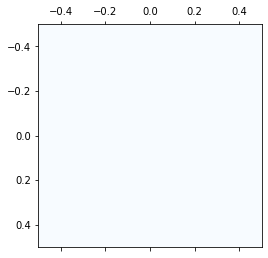

In [69]:
import matplotlib.pyplot as plt

plt.matshow(cm, cmap='Blues')
plt.show()